# 3.15.x Final Assignment

### Assignment Instructions

#### Part 2   |   Advanced Difficulty Level

In this second part, you will be working with a datasets containing information on indian startups' funding, including the startup's details, the funding it received, and the investors' information. 

In the usual `data` folder, you will find the following three datasets, including data from 2019, 2020 and 2021: 

- `startup_funding2019.csv`
- `startup_funding2020.csv`
- `startup_funding2021.csv`

At [this link](https://www.kaggle.com/datasets/omkargowda/indian-startups-funding-data?select=startup_funding2019.csv) you can find the source of the original data (Kaggle) as well as more information on its composition *(note: the files in the data folder are slightly different from the originals)*.

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Using a **for loop**, load all three .csv files in a temporary DataFrame called `df_tmp` and, at each cycle, add a new column named `Year` that includes the year of that csv file to the temporary table and append it to a final DataFrame named `fnd`. Your final `fnd` DataFrame should include the contents from all three csv files stacked one on top of the other. 

    What is the **shape** of the `fnd` DataFrame? 

In [327]:

fnd = pd.DataFrame()

# Lista dei nomi dei file CSV
csv_files = ['startup_funding2019.csv', 'startup_funding2020.csv', 'startup_funding2021.csv']

# Ciclo for per caricare i file CSV e aggiungere la colonna Year
for csv_file in csv_files:
    # Carica il file CSV nel DataFrame temporaneo df_tmp
    df_tmp = pd.read_csv(csv_file)
    print( df_tmp.shape )
    # Estrai l'anno dal nome del file CSV
    year = csv_file[-8:-4]  
    
    # Aggiungi la colonna Year al DataFrame temporaneo df_tmp
    df_tmp['Year'] = year
    
    # Appendi il DataFrame temporaneo df_tmp al DataFrame finale fnd
    fnd = pd.concat([fnd, df_tmp], ignore_index=True)
    
# Mostra il DataFrame finale fnd
print("\n The shape of the `fnd` DataFrame is:", fnd.shape, '\n')
print(fnd)

(89, 9)
(1052, 9)
(1202, 9)

 The shape of the `fnd` DataFrame is: (2343, 10) 

       Company/Brand Founded HeadQuarter                 Sector  \
0     Bombay Shaving     NaN         NaN              Ecommerce   
1          Ruangguru  2014.0      Mumbai                 Edtech   
2           Eduisfun     NaN      Mumbai                 Edtech   
3           HomeLane  2014.0     Chennai        Interior design   
4           Nu Genes  2004.0   Telangana               AgriTech   
...              ...     ...         ...                    ...   
2338        Gigforce    2019    Gurugram  Staffing & Recruiting   
2339          Vahdam    2015   New Delhi       Food & Beverages   
2340    Leap Finance    2019   Bangalore     Financial Services   
2341    CollegeDekho    2015    Gurugram                 EdTech   
2342          WeRize    2019   Bangalore     Financial Services   

                                           What it does  \
0            Provides a range of male grooming products 

2. If you check the columns' data types, you'll notice that the columns `Founded`, `Amount($)` and `Year` are being interpreted as strings instead of numbers. Format those three columns to numeric data types. 

    What is the **total** `Amount($)` of funding given in the three years available?

In [328]:
# La funzione leva virgole e $ dalla colonna
def convert_to_number(stringa):
    return (stringa.replace(',', '').replace('$', ''))

# Applica la conversione a tutta la colonna 
fnd['Amount($)'] = fnd['Amount($)'].apply(lambda x: convert_to_number(x) if pd.notnull(x) else x)

In [329]:
fnd['Founded']= pd.to_numeric(fnd['Founded'], downcast='integer', errors='coerce')
fnd['Amount($)']= pd.to_numeric(fnd['Amount($)'], downcast='float', errors='coerce')
fnd['Year']= pd.to_numeric(fnd['Year'], errors='coerce')

In [330]:
fnd

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000.0,NaN,2019
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000.0,Series C,2019
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000.0,Fresh funding,2019
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...",30000000.0,Series D,2019
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),6000000.0,NaN,2019
...,...,...,...,...,...,...,...,...,...,...
2338,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,3000000.0,Pre-series A,2021
2339,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,20000000.0,Series D,2021
2340,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,55000000.0,Series C,2021
2341,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",26000000.0,Series B,2021


In [331]:
total_funding = fnd['Amount($)'].sum()
print(total_funding)

271544633855.83002


3. The following code shows us that "Inflection Point Ventures" was the `Investor` that funded the highest number of `Company/Brand`s overall (36 companies funded from 2019 to 2021). 

    How did "Inflection Point Ventures" **rank** *(in terms of most `Company/Brand`s funded) **in 2020**? (Note: in the answer write the rank number, where 1 = most funded company)*

In [332]:
# run this cell (don not delete it)
fnd.groupby('Investor', as_index=False).size().sort_values('size', ascending=False).head(1)

,Investor,size
696,Inflection Point Ventures,36


In [333]:
supp=fnd[fnd['Year']==2020].groupby('Investor', as_index=False).size().sort_values('size', ascending=False).reset_index()

(supp['Investor'].tolist().index('Inflection Point Ventures'))+1


4

4. Load the `Software Professionals Salary.csv` file in a DataFrame named `sps` (just like you did in Part 1), then perform the following tasks **and answer the question at the end**: 
    1. starting from the `sps` DataFrame, create a new DF called `sps_loc` where you group by `Location` and show, for each city in the dataset, the average `Rating` and `Salary`;
    2. starting from the `fnd` DataFrame, create a new DF called `fnd_loc` where you group by `HeadQuarter` and show, for each city in the dataset **for the year 2021**, the total number of `Company/Brand`s funded and the total `Amount($)` invested;
    3. merge the two DataFrames you just created so to **keep just the cities that are in both datasets** and save the results in a third DataFrame called `sps_fnd_loc` *(note: make sure to use the correct type of join)*;
    4. using the `sps_fnd_loc` DataFrame: 
        1. delete the `HeadQuarter` column
        2. create a new column `Amount($MM)` that is equal to `Amount($)` divided by 1,000,000
        3. delete the `Amount($)` column
        4. rename all the columns to the following names: `['City', 'Avg. Rating', 'Avg. Salary', 'Nr. Companies Funded', 'Sum Funding ($MM)']`
    
    **Question**: Look at the `City` that received the **highest** `Avg. Rating` score by employees: what is the `Nr. Companies Funded` in that city? 

In [334]:
file = pd.read_csv ("Software Professionals Salary.csv")
sps = pd.DataFrame(file)

In [335]:
sps_loc = sps.groupby('Location').agg({"Rating":["mean"], "Salary":["mean"]}).round(3).reset_index()

In [336]:
fnd_loc = fnd[fnd['Year']==2021].groupby('HeadQuarter').agg({"Company/Brand":["count"], "Amount($)":["sum"]}).round(3).reset_index()

In [337]:
sps_fnd_loc = pd.merge(sps_loc, fnd_loc, left_on='Location', right_on='HeadQuarter', how='inner')

In [338]:
sps_fnd_loc.drop('HeadQuarter', axis=1, inplace=True)
sps_fnd_loc['Amount($MM)'] = sps_fnd_loc['Amount($)'] / 1000000
sps_fnd_loc.drop('Amount($)', axis=1, inplace=True)
sps_fnd_loc.columns = ['City', 'Avg. Rating', 'Avg. Salary', 'Nr. Companies Funded', 'Sum Funding ($MM)']

C:\Users\user\AppData\Local\Temp\ipykernel_8660\529021505.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  sps_fnd_loc.drop('HeadQuarter', axis=1, inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_8660\529021505.py:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  sps_fnd_loc.drop('Amount($)', axis=1, inplace=True)


In [339]:
highest_rating_city = sps_fnd_loc.loc[sps_fnd_loc['Avg. Rating'].idxmax(), 'City']
nr_companies_funded = sps_fnd_loc.loc[sps_fnd_loc['City'] == highest_rating_city, 'Nr. Companies Funded'].values[0]
print (highest_rating_city, nr_companies_funded)

Kolkata 5


In [340]:
nr_companies_funded

5

In [341]:
sps_fnd_loc

,City,Avg. Rating,Avg. Salary,Nr. Companies Funded,Sum Funding ($MM)
0,Bangalore,3.920,735344.740,425,14327.42
1,Chennai,3.903,584559.662,40,717.14
2,Hyderabad,3.914,679099.157,34,243.96
3,Jaipur,3.941,629135.802,11,343.30
4,Kolkata,4.025,710925.573,5,28.00
5,Mumbai,3.882,961180.368,200,153830.30
6,New Delhi,3.943,658756.736,143,1673.01
7,Pune,3.886,690476.311,46,509.07


5. Create a scatterplot that shows the relationship between the `Avg. Salary` and the `Sum Funding ($MM)`. Which `City` stands out in terms of total funding received by companies and salary paid to their employees? 

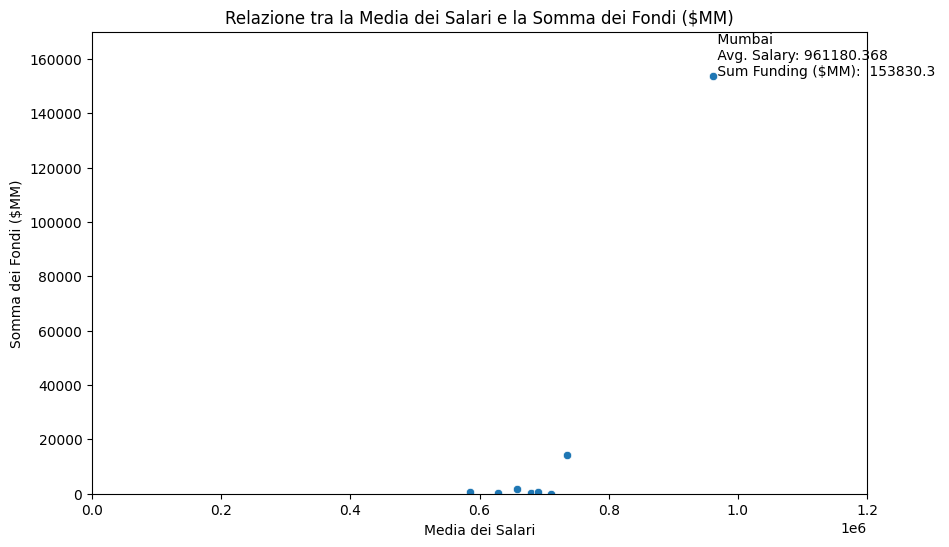

In [342]:
# Crea il grafico utilizzando Seaborn
plt.figure(figsize=(10, 6))  # Imposta la dimensione del grafico
plt.xlim(0, 1200000)
plt.ylim(0, 170000)

# Disegna il grafico a dispersione utilizzando Seaborn
sns.scatterplot(data=sps_fnd_loc, x='Avg. Salary', y='Sum Funding ($MM)')

# Imposta il titolo del grafico e le etichette degli assi
plt.title('Relazione tra la Media dei Salari e la Somma dei Fondi ($MM)')
plt.xlabel('Media dei Salari')
plt.ylabel('Somma dei Fondi ($MM)')

# Aggiungi le etichette dei punti al grafico utilizzando Matplotlib
for i in range(len(sps_fnd_loc)):
    if sps_fnd_loc['Sum Funding ($MM)'][i]>100000:
        
        labels= f" {sps_fnd_loc['City'][i]} \n Avg. Salary: {sps_fnd_loc['Avg. Salary'][i]} \n Sum Funding ($MM):  {sps_fnd_loc['Sum Funding ($MM)'][i]} "
        plt.text(sps_fnd_loc['Avg. Salary'][i], sps_fnd_loc['Sum Funding ($MM)'][i], labels)
    

# Mostra il grafico
plt.show()

6. [BONUS] --> optional

    Using libraries of your choice, scrape [this census page](https://www.census2011.co.in/city.php) and create a DataFrame called `cities` containing the first table from that page. *(Note: make sure to convert the variables `Population` and `Literacy` to numeric, you will need them later)*
    1. Which City has the highest levels of `Literacy` in the country?
    2. Merge the `cities` table with the `sps_fnd_loc` in a new DataFrame called `sps_fnd_loc_lit`. The resulting DataFrame is missing one row compared to the `sps_fnd_loc` dataset. Which `City` is missing? Figure out why and fix the problem. 
    3. Looking at the new `sps_fnd_loc_lit` DataFrame, produce a scatterplot that shows `Literacy` on the x-axis, `Avg. Salary` on the y-axis and the `Population` as the size of the circles. Try also to add the `City` labels to each circle in the chart. There seems to be a positive direct relationship between the two variables (higher levels of literacy correspond to higher salaries), but there is one city that escapes this interpretation. Which city is it? Try to describe the chart and give your interpretation. 

In [343]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = "https://www.census2011.co.in/city.php"
page = requests.get(url)

print(page.text)

In [345]:
soup = BeautifulSoup(page.content, "html.parser")

In [346]:
# step_1 = soup.find('div', class_ ="container-xxl bd-gutter mt-3 my-md-4 bd-layout")
# step_2 = soup.find('div', class_ ="bd-intro pt-2 ps-lg-2")
step_3 = soup.find('table', class_ ="table table2 filter table-striped table-hover")

In [347]:
# Recupero tutti i tag dei titoli delle colonne
titoli_col_sup = soup.find_all('th')

In [348]:
# Inserisco i titoli in una lista
titoli_col = []
for c in titoli_col_sup: 
    titoli_col.append(c.text)

In [349]:
# Recupero tutte i tag delle righe della tabella
righe_tab_sup = soup.find_all('tr')

In [350]:
# Inserisco ciascun elemeno della riga nell'apposita lista
rank=[]; City=[]; State=[]; Population=[]; Metropolitan=[]; Sexratio=[]; Literacy=[]
for i in range (1, len(righe_tab_sup)) :
    
    rank.append( righe_tab_sup[i].find_all('td')[0].text )
    City.append( righe_tab_sup[i].find_all('td')[1].text )
    State.append( righe_tab_sup[i].find_all('td')[2].text )
    Population.append( righe_tab_sup[i].find_all('td')[3].text )
    Metropolitan.append( righe_tab_sup[i].find_all('td')[4].text )
    Sexratio.append( righe_tab_sup[i].find_all('td')[5].text )
    Literacy.append( righe_tab_sup[i].find_all('td')[6].text )


In [351]:
datasets= [rank, City, State, Population, Metropolitan, Sexratio, Literacy]

In [352]:
cities = pd.DataFrame(datasets, titoli_col).T

In [353]:
cities["Population"] = [float(str(i).replace(",", "")) for i in cities["Population"]]
cities['Population']= pd.to_numeric(cities['Population'], downcast='integer', errors='coerce')
cities['Literacy']= pd.to_numeric(cities['Literacy'], downcast='integer', errors='coerce')

In [ ]:
cities

In [355]:
city_highest_literacy = cities.loc[cities['Literacy'].idxmax(), 'City']
city_highest_literacy

'Aizawl'

In [356]:
sps_fnd_loc_lit = pd.merge(cities, sps_fnd_loc, left_on='City', right_on='City', how='inner')

In [ ]:
print( sps_fnd_loc['City'].sort_values() )
print( sps_fnd_loc_lit['City'].sort_values() )

In [358]:
nomi_mancanti = sps_fnd_loc[~sps_fnd_loc['City'].isin(sps_fnd_loc_lit['City'])]['City']

In [359]:
nomi_mancanti

6    New Delhi
Name: City, dtype: object

Dal nome mancante si evince che il **problema** è rappresentato dal **modo diverso** in cui è stata scritta `la stessa città`

In [360]:
cities['City'] = cities['City'].replace('Delhi', 'New Delhi')

In [361]:
sps_fnd_loc_lit = pd.merge(cities, sps_fnd_loc, left_on='City', right_on='City', how='inner')


In [362]:
sps_fnd_loc_lit

,#,City,State,Population,Metropolitan,Sexratio,Literacy,Avg. Rating,Avg. Salary,Nr. Companies Funded,Sum Funding ($MM)
0,1,Mumbai,Maharashtra,12442373,"18,414,288",853,89.73,3.882,961180.368,200,153830.30
1,2,New Delhi,Delhi,11034555,"16,314,838",876,87.59,3.943,658756.736,143,1673.01
2,3,Bangalore,Karnataka,8443675,"8,499,399",923,88.71,3.920,735344.740,425,14327.42
3,4,Hyderabad,Andhra Pradesh,6731790,"7,749,334",955,83.26,3.914,679099.157,34,243.96
4,6,Chennai,Tamil Nadu,4646732,"8,696,010",989,90.18,3.903,584559.662,40,717.14
5,7,Kolkata,West Bengal,4496694,"14,112,536",908,86.31,4.025,710925.573,5,28.00
6,9,Pune,Maharashtra,3124458,"5,049,968",948,89.56,3.886,690476.311,46,509.07
7,10,Jaipur,Rajasthan,3046163,"3,046,163",900,83.33,3.941,629135.802,11,343.30


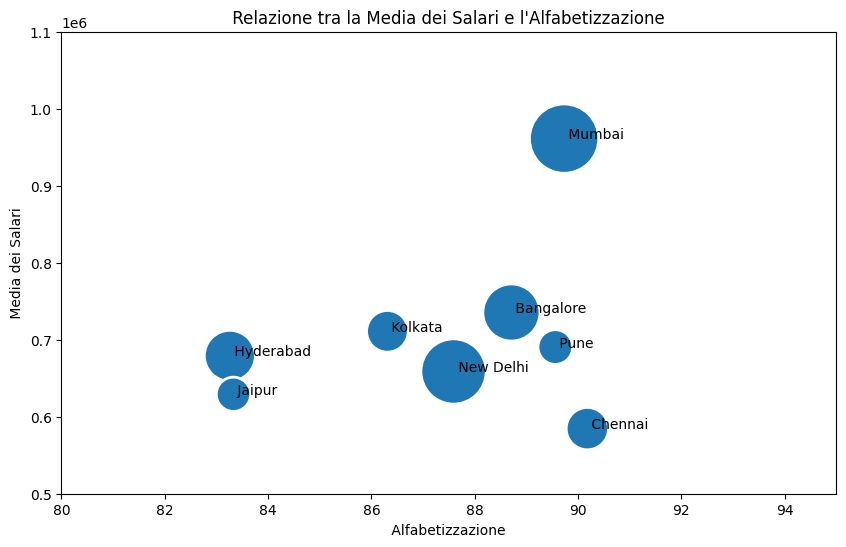

In [425]:
# Crea il grafico utilizzando Seaborn
plt.figure(figsize=(10, 6))  # Imposta la dimensione del grafico
plt.xlim(80, 95)
plt.ylim(500000, 1100000)

# Disegna il grafico a dispersione utilizzando Seaborn
sns.scatterplot(data=sps_fnd_loc_lit, x='Literacy', y='Avg. Salary', s=(sps_fnd_loc_lit['Population']/5000))

# Imposta il titolo del grafico e le etichette degli assi
plt.title(' Relazione tra la Media dei Salari e l\'Alfabetizzazione ')
plt.xlabel(' Alfabetizzazione ')
plt.ylabel(' Media dei Salari ')

# Aggiungi le etichette dei punti al grafico utilizzando Matplotlib
for i in range(len(sps_fnd_loc_lit)):
        
        labels= f" {sps_fnd_loc_lit['City'][i]}  "
        plt.text(sps_fnd_loc_lit['Literacy'][i], sps_fnd_loc_lit['Avg. Salary'][i], labels)
    

# Mostra il grafico
plt.show()

In [306]:
sps_fnd_loc_lit

,#,City,State,Population,Metropolitan,Sexratio,Literacy,Avg. Rating,Avg. Salary,Nr. Companies Funded,Sum Funding ($MM)
0,1,Mumbai,Maharashtra,12442373.0,"18,414,288",853,89.73,3.882,961180.368,200,153830.30
1,2,New Delhi,Delhi,11034555.0,"16,314,838",876,87.59,3.943,658756.736,143,1673.01
2,3,Bangalore,Karnataka,8443675.0,"8,499,399",923,88.71,3.920,735344.740,425,14327.42
3,4,Hyderabad,Andhra Pradesh,6731790.0,"7,749,334",955,83.26,3.914,679099.157,34,243.96
4,6,Chennai,Tamil Nadu,4646732.0,"8,696,010",989,90.18,3.903,584559.662,40,717.14
5,7,Kolkata,West Bengal,4496694.0,"14,112,536",908,86.31,4.025,710925.573,5,28.00
6,9,Pune,Maharashtra,3124458.0,"5,049,968",948,89.56,3.886,690476.311,46,509.07
7,10,Jaipur,Rajasthan,3046163.0,"3,046,163",900,83.33,3.941,629135.802,11,343.30


Come si può osservare, `Chennai` risulta avere un alto grado di alfabetizzazione rispetto alla bassa madia dei salari. Una motivazione si potrebbe trovare nel suo più alto valore di **sexratio** (cioè ci sono 989 donne ogni 1000 uomini). Infatti, con molta probabilità, l'alto numero di donne influisce positivamente sul grado di alfabetizzazione della città. 